# Carmax Analytics Competition 

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from bisect import bisect_right 

In [3]:
df = pd.read_csv("C:/Users/msado/Documents/CarMax.csv") 
df2 = pd.read_excel("C:/Users/msado/Documents/national_M2019_dl.xlsx")

In [3]:
df.describe

<bound method NDFrame.describe of         insert_num purchase_make purchase_model  purchase_vehicle_year  \
0            81690         DODGE        CHARGER                   2012   
1           109994          FORD           F150                   2007   
2            11399           BMW            328                   2010   
3           214156         LEXUS         GS 300                   2003   
4            36685     CHEVROLET          CRUZE                   2012   
...            ...           ...            ...                    ...   
355869      195314          JEEP        LIBERTY                   2010   
355870       58219     CHEVROLET          SONIC                   2012   
355871      207386           KIA        SORENTO                   2012   
355872      252391        NISSAN           350Z                   2003   
355873       52652     CHEVROLET         MALIBU                   2012   

       purchase_price  trade_in  vehicle_financing customer_age  \
0       15

In [3]:
print(df.dtypes)

insert_num                      int64
purchase_make                  object
purchase_model                 object
purchase_vehicle_year           int64
purchase_price                 object
trade_in                        int64
vehicle_financing               int64
customer_age                   object
customer_income                object
customer_gender                object
customer_previous_purchase      int64
customer_distance_to_dealer    object
post_purchase_satisfaction     object
vehicle_warranty_used           int64
subsequent_purchases            int64
dtype: object


## Create Unique variables 

In [9]:
jobs = df2['occ_title']
median_salary = df2['a_median']
annual_bottom = df2['a_pct10']
cust_income = df['customer_income']
cust_age = df['customer_age']
vehicle_cost = df['purchase_price']
distance = df['customer_distance_to_dealer']
gender = df['customer_gender']



## Cleaning up distance to dealership

In [10]:
distance_bin = [25,50,75,100,250,500,9999]
distance_total = [0]*len(distance_bin)

total = 0
no_distance = 0
new_distances = [] 
for i in range(len(distance)):
    try:
        if distance[i] == "?":
            no_distance += 1
            continue
        slot = bisect_right(distance_bin,int(distance[i]))
    except:
        print(i,distance[i])
        raise
    total += 1
    distance_total[slot] += 1
    new_distances.append(slot) 
for i in range(len(distance_total)):
    distance_total[i] = float(distance_total[i]* 1.0 /total)
distance_total


                           


[0.8784261702656881,
 0.07884015541597217,
 0.022817786494592176,
 0.009000174399821597,
 0.009551963999302401,
 0.0004031208991025557,
 0.0009606285255209838]

In [11]:
# Using choice() method 
pick1 = np.random.choice(len(distance_total), no_distance, p = distance_total) 

new_place = []
count = 0 
for i in range(len(distance)):
    if distance[i] == '?':
        val = pick1[count] 
        count += 1
        #x = random.randint(0,len(income_ranges)- 1)
        new_place.append(distance_bin[val] )
    else:
        new_place.append(distance_bin[bisect_right(distance_bin,int(distance[i]))])

        
df['new_place']= new_place



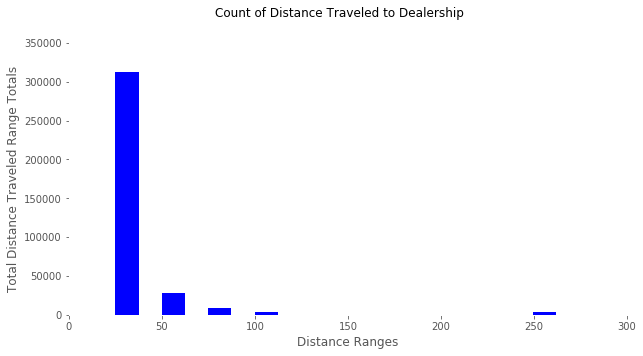

In [29]:
fig, ax = plt.subplots()
ax.hist(new_place, color = 'b',bins = 800)

fig.suptitle('Count of Distance Traveled to Dealership')
fig.set_size_inches(10,5)

ax.xaxis.set_label_text('Distance Ranges')
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 

ax.yaxis.set_label_text('Total Distance Traveled Range Totals')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off


ax.set_xlim(0,300)
ax.set_ylim(0,350000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)



ax.patch.set_facecolor('white')



## Cleaning up Vehicle Purchase Price 

In [30]:
new_purchase_prices = set()
no_vehicle_count = 0
for num in vehicle_cost:
    if num == '?':
        no_vehicle_count += 1
        continue
    parts1 = num.split("-")
    if len(parts1) == 2:
        new_purchase_prices.add((int(parts1[0]),int(parts1[1])))
    else:
        new_purchase_prices.add((int(parts1[0][:-1])))
new_purchase_prices= list(new_purchase_prices)
new_purchase_prices.sort()

new_purchase_prices

[(5001, 10000),
 (10001, 15000),
 (15001, 20000),
 (20001, 25000),
 (25001, 30000),
 (30001, 35000),
 (35001, 40000),
 (40001, 45000),
 (45001, 50000),
 (50001, 55000),
 (55001, 60000),
 (60001, 65000),
 (65001, 70000),
 (70001, 75000),
 (75001, 80000),
 (80001, 85000),
 (85001, 90000),
 (90001, 95000)]

In [31]:
# Using choice() method 
probs1 = [0.025599164,0.284310888,0.332154067,0.186418674,0.090847526,0.042894757,0.020431561,0.008601431,0.004425761,0.001910805,0.001048133,0.000584481,0.000382161,0.00017984,0.0001124,3.93401E-05,4.77701E-05,1.124E-05]
Car_purchase = np.random.choice(len(probs1), no_vehicle_count, p = probs1) 

new_purchase = []
high_purchase = []
count = 0 
for i in range(len(vehicle_cost)):
    if vehicle_cost[i] == '?':
        val = Car_purchase[count] 
        count += 1
        #x = random.randint(0,len(income_ranges)- 1)
        high_purchase.append(new_purchase_prices[val][1]) 
        new_purchase.append( '%d - %d'%(new_purchase_prices[val][0],new_purchase_prices[val][1]) )
    else:
        new_purchase.append(vehicle_cost[i])
        high_purchase.append(int(vehicle_cost[i].split("-")[1]))

df['new_purchase']= new_purchase
df['high_purchase'] = high_purchase






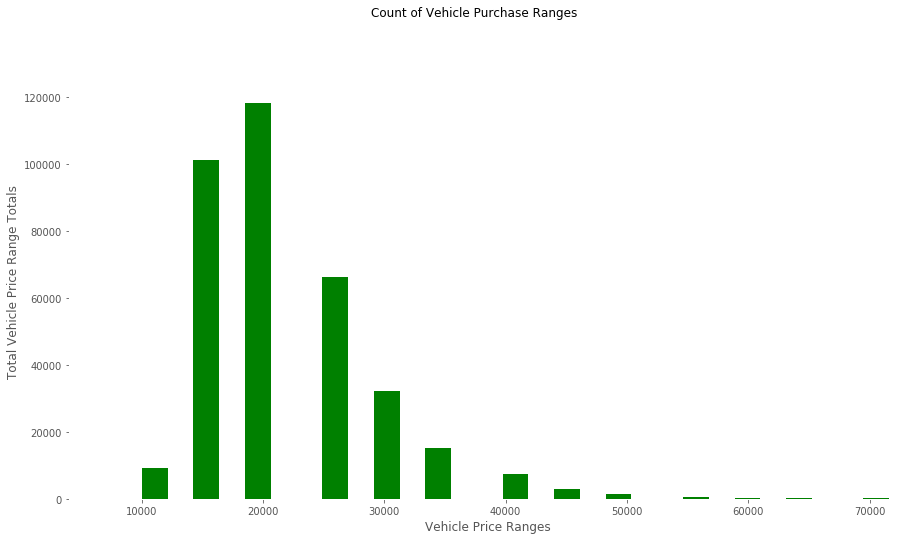

In [33]:
fig, ax = plt.subplots()
ax.hist(df['high_purchase'], color = 'g',bins = 40)

fig.suptitle('Count of Vehicle Purchase Ranges')
fig.set_size_inches(15,8)

ax.xaxis.set_label_text('Vehicle Price Ranges')
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 

ax.yaxis.set_label_text('Total Vehicle Price Range Totals')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off


plt.style.use('ggplot')
ax.set_xlim(4000,73000)
ax.set_ylim(0,130000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.patch.set_facecolor('white')


## Clean up the customer ages

In [34]:
age_ranges = set()
for num in cust_age:
    if num == '?':
        continue
    parts1 = num.split("-")
    if len(parts1) == 2:
        age_ranges.add((int(parts1[0]),int(parts1[1])))
    else:
        age_ranges.add((int(parts1[0][:-1]),110))

age_ranges= list(age_ranges)
age_ranges.sort()
# Removing age ranges above 100's as it could mean fraud 
#del age_ranges[9]
age_ranges

[(0, 20),
 (21, 30),
 (31, 40),
 (41, 50),
 (51, 60),
 (61, 70),
 (71, 80),
 (81, 90),
 (91, 100),
 (101, 110)]

In [35]:
new_ages = []
high_ages = []

for i in range(len(cust_age)):
    if cust_age[i] == "101+":
        new_ages.append(cust_age[i])
        high_ages.append(101)
    elif cust_age[i] == '?':
        y = random.randint(0,len(age_ranges)- 1)
        high_ages.append(age_ranges[y][1]) 
        new_ages.append( '%d - %d'%(age_ranges[y][0],age_ranges[y][1]) )
    else:
        new_ages.append(cust_age[i])
        high_ages.append(int(cust_age[i].split("-")[1]))


### High ages indicate the bin for age range 
df['high_ages'] = high_ages
df['new_ages']= new_ages


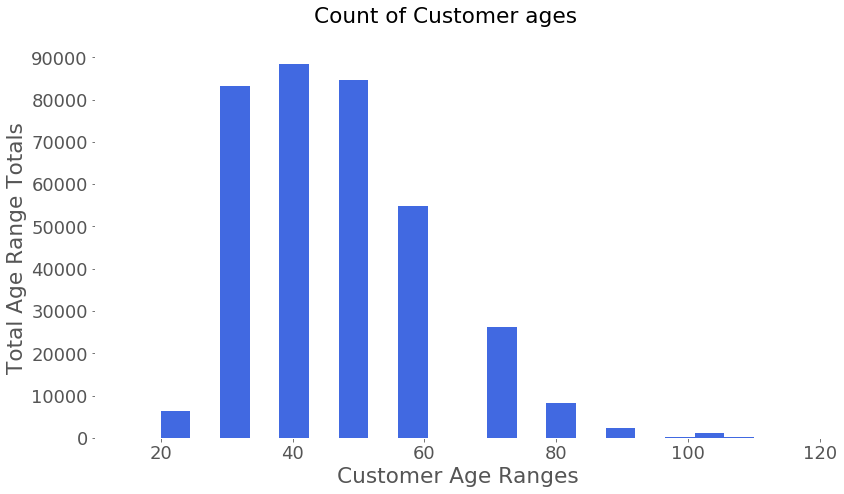

In [68]:
fig, ax = plt.subplots()
ax.hist(df['high_ages'], color = 'royalblue',bins = 20)

fig.suptitle('Count of Customer ages')
fig.set_size_inches(13,7)

ax.xaxis.set_label_text('Customer Age Ranges')
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 

ax.yaxis.set_label_text('Total Age Range Totals')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off


ax.set_xlim(10,120)
ax.set_ylim(0,90000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.patch.set_facecolor('white')
plt.rcParams.update({'font.size': 20})


## Want to rearrange the data so that income doesn't include dashes

In [37]:
income_ranges = set()
no_income_count = 0
for val in cust_income:
    if val == '?':
        no_income_count += 1
        continue 
    parts = val.split('-')
    #print(parts)
    if len(parts) == 2:
        income_ranges.add((int(parts[0]),int(parts[1])))
    else:
        income_ranges.add((int(parts[0][:-1]),1000001))
income_ranges= list(income_ranges)

income_ranges.sort()
income_ranges

[(0, 20000),
 (20001, 40000),
 (40001, 60000),
 (60001, 80000),
 (80001, 100000),
 (100001, 120000),
 (120001, 140000),
 (140001, 160000),
 (160001, 180000),
 (180001, 200000),
 (200001, 1000001)]

### Give values to the "?" in the data set

In [38]:
# Using choice() method 
probs = [0.105374408,0.260926951,0.248560715,0.137332352,0.095628574,0.051049452,0.024070919,0.024416218,0.01211775,0.005327938,0.035194723]
pick1 = np.random.choice(len(probs), no_income_count, p = probs) 

high_income = []
new_income = []
count = 0 
for i in range(len(cust_income)):
    if cust_income[i] == '200001+':
        new_income.append(cust_income[i])
        high_income.append(1000001)
    elif cust_income[i] == '?':
        val = pick1[count] 
        count += 1
        #x = random.randint(0,len(income_ranges)- 1)
        high_income.append(income_ranges[val][1])
        new_income.append( '%d - %d'%(income_ranges[val][0],income_ranges[val][1]) )
    else:
        new_income.append(cust_income[i])
        high_income.append(int(cust_income[i].split("-")[1]))
    
    
    
    
df['new_income']= new_income
df['high_income'] = high_income





# High Income indicates the top value i


['40001 - 60000',
 '0 - 20000',
 '60001 - 80000',
 '20001 - 40000',
 '120001 - 140000',
 '60001 - 80000',
 '20001 - 40000',
 '80001 - 100000',
 '40001 - 60000',
 '140001 - 160000',
 '20001 - 40000',
 '0 - 20000',
 '20001 - 40000',
 '200001 - 1000001',
 '20001 - 40000',
 '100001 - 120000',
 '60001 - 80000',
 '40001 - 60000',
 '60001 - 80000',
 '80001 - 100000',
 '60001 - 80000',
 '20001 - 40000',
 '40001 - 60000',
 '20001 - 40000',
 '60001 - 80000',
 '40001 - 60000',
 '20001 - 40000',
 '40001 - 60000',
 '40001 - 60000',
 '0 - 20000',
 '80001 - 100000',
 '80001 - 100000',
 '0 - 20000',
 '40001 - 60000',
 '40001 - 60000',
 '60001 - 80000',
 '40001 - 60000',
 '60001 - 80000',
 '80001 - 100000',
 '60001 - 80000',
 '60001 - 80000',
 '100001 - 120000',
 '20001 - 40000',
 '80001 - 100000',
 '40001 - 60000',
 '20001 - 40000',
 '120001 - 140000',
 '20001 - 40000',
 '60001 - 80000',
 '20001 - 40000',
 '60001 - 80000',
 '60001 - 80000',
 '20001 - 40000',
 '40001 - 60000',
 '20001 - 40000',
 '40001

###  Plot Distributions

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


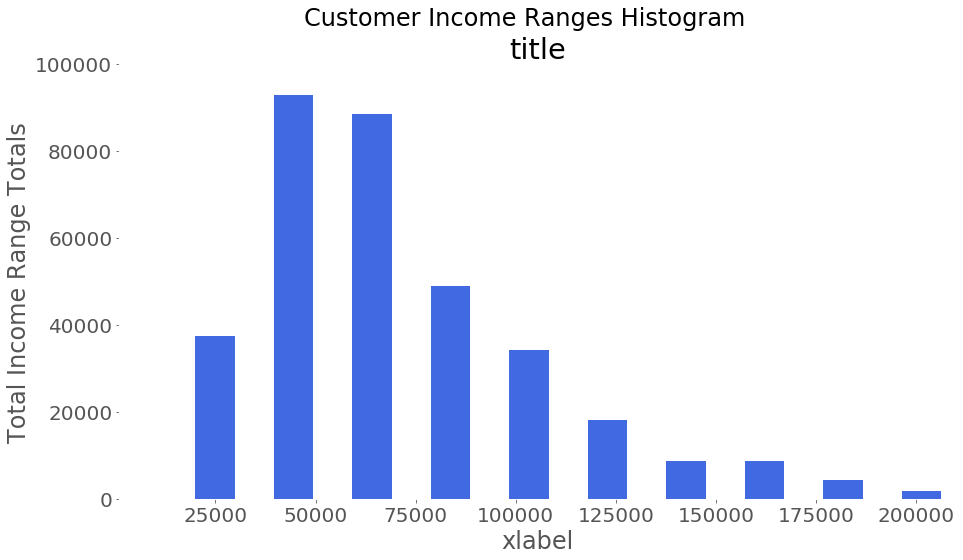

In [71]:
fig, ax = plt.subplots()
ax.hist(df['high_income'], color = 'royalblue',bins = 100)

fig.suptitle('Customer Income Ranges Histogram')
fig.set_size_inches(15,8)

ax.xaxis.set_label_text('Customer Income Ranges')
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 

ax.yaxis.set_label_text('Total Income Range Totals')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off
abline =True 
ax.set_xlim(1000,210000)
ax.set_ylim(0,100000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.patch.set_facecolor('white')
plt.rcParams.update({'font.size': 20})

csfont = {'fontname':'Nunito'}
hfont = {'fontname':'Nunito'}

plt.title('title',**csfont)
plt.xlabel('xlabel', **hfont)
plt.show()

## Giving Associated Values to Gender

In [40]:
new_gender = []

for val in gender:
    if val == "M":
        new_gender.append(0)
    elif val == "F":
        new_gender.append(1)
    else:
        new_gender.append(2)
        
df['new_gender']= new_gender
new_gender



[2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,


## Purchase and Make Combination 

In [41]:
make_model_bins = set()
for i in range(len(df['purchase_make'])):
    s = df['purchase_make'][i] +  ' ' + df['purchase_model'][i]
    make_model_bins.add(s)
make_model_bins = list(make_model_bins)

make_model = []
for i in range(len(df['purchase_make'])):
    s = df['purchase_make'][i] +  ' ' + df['purchase_model'][i]
    make_model.append( make_model_bins.index(s))

    

df['make_model'] = make_model

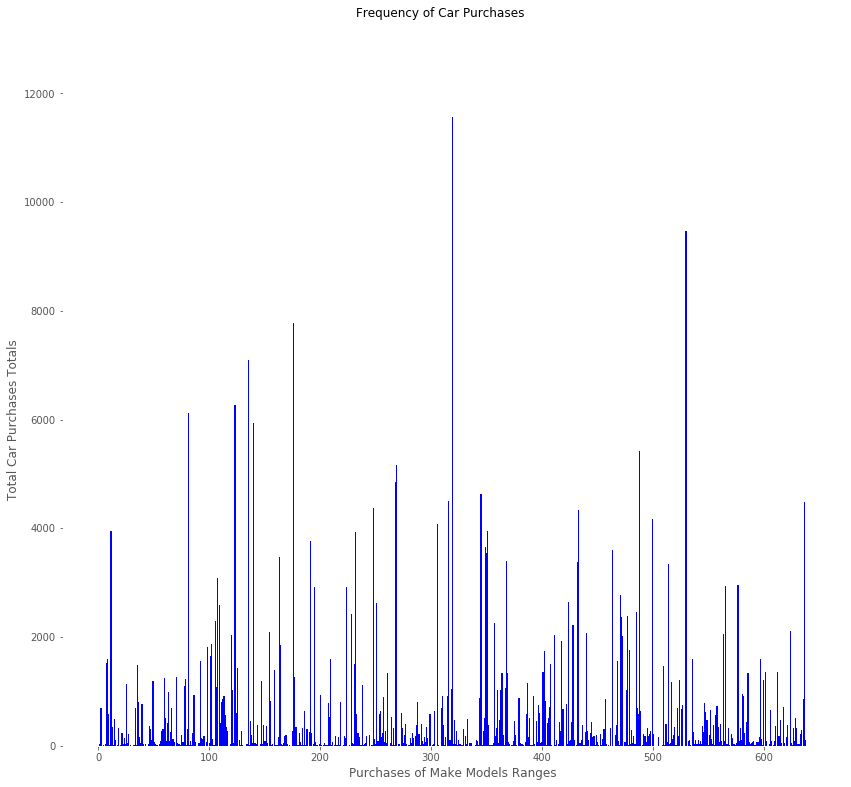

In [46]:
fig, ax = plt.subplots()
ax.hist(df['make_model'], color = 'blue',bins = 641)

fig.suptitle('Frequency of Car Purchases')
fig.set_size_inches(14,12)

ax.xaxis.set_label_text('Purchases of Make Models Ranges')
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 

ax.yaxis.set_label_text('Total Car Purchases Totals')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off
abline =True 
ax.set_ylim(0,12000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.patch.set_facecolor('white')


## Incoprating BLS jobs data with customer income

In [54]:
job_pairs = {}
for i in range(len(annual_bottom)):
    try:
        bottom = int(annual_bottom[i])
        if bottom < 21000:
            if job_pairs.get(20000) is None:
                job_pairs[20000] = [ jobs[i] ]
            else:
                job_pairs[20000].append(jobs[i])
    except: 
        pass
        
for i in range(len(median_salary)):
    for low,high in income_ranges:
        try:
            salary = int(median_salary[i])
            if salary >= low and salary <= high:
                if job_pairs.get(high) is None:
                    job_pairs[high] = [ jobs[i] ]
                else:
                    job_pairs[high].append( jobs[i] )
        except: 
            pass

job_assign = []
for i in range(len(high_income)):
    for low,high in income_ranges:
        if high_income[i] == high:
            job_assign.append(job_pairs[high][random.randint(0,len(job_pairs[high])-1)])
            break
 
        
#len(df)
df['job_assign']= job_assign

#job_pairs[20000]

#for key, value in job_pairs.items():
 #   print(key, value)
K = 2
  
# Using items() + list slicing 
# Get first K items in dictionary 
res = dict(list(job_pairs.items())[0: K]) 
res

{20000: ['Legislators',
  'Labor Relations Specialists',
  'Religious Workers, All Other',
  'Other Teachers and Instructors',
  'Substitute Teachers, Short-Term',
  'Other Educational Instruction and Library Occupations',
  'Teaching Assistants, Postsecondary',
  'Teaching Assistants, Except Postsecondary',
  'Educational Instruction and Library Workers, All Other',
  'Craft Artists',
  'Fine Artists, Including Painters, Sculptors, and Illustrators',
  'Floral Designers',
  'Entertainers and Performers, Sports and Related Workers',
  'Athletes and Sports Competitors',
  'Coaches and Scouts',
  'Umpires, Referees, and Other Sports Officials',
  'Broadcast Announcers and Radio Disc Jockeys',
  'Photographers',
  'Dietetic Technicians',
  'Healthcare Support Occupations',
  'Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides',
  'Home Health and Personal Care Aides',
  'Occupational Therapy Aides',
  'Physical Therapist Aides',
  'Pharmacy Aides

NameError: name 'head' is not defined

## See who pursued financing 

In [20]:
fin = []
for i in range(len(df)):
    if df['vehicle_financing'][i] == 1:
        fin.append([df['new_ages'][i],df['vehicle_financing'][i],df['new_income'][i],df['purchase_make'][i]])

values = pd.DataFrame[fin]

TypeError: 'type' object is not subscriptable

# Sending all the Data to a CSV

In [32]:
# displaying the DataFrame 
print('DataFrame:\n', df) 
   
# saving the DataFrame as a CSV file 
newData_csv_data = df.to_csv('newdata.csv', index = True) 
print('\nCSV String:\n', newData_csv_data) 

DataFrame:
         insert_num purchase_make purchase_model  purchase_vehicle_year  \
0            81690         DODGE        CHARGER                   2012   
1           109994          FORD           F150                   2007   
2            11399           BMW            328                   2010   
3           214156         LEXUS         GS 300                   2003   
4            36685     CHEVROLET          CRUZE                   2012   
...            ...           ...            ...                    ...   
355869      195314          JEEP        LIBERTY                   2010   
355870       58219     CHEVROLET          SONIC                   2012   
355871      207386           KIA        SORENTO                   2012   
355872      252391        NISSAN           350Z                   2003   
355873       52652     CHEVROLET         MALIBU                   2012   

       purchase_price  trade_in  vehicle_financing customer_age  \
0       15001 - 20000         1 

### Visualize the data 

In [40]:
cat_totals = df.groupby("new_ages")["job_assign"].sum().sort_values()
cat_totals

new_ages
31 - 40     Computer and Information Research ScientistsPe...
0 - 20      Electrical and Electronic Engineering Technolo...
101+        Family Medicine PhysiciansComputer and Mathema...
71 - 80     Farmworkers, Farm, Ranch, and Aquacultural Ani...
51 - 60     Home Health and Personal Care Aides; and Nursi...
21 - 30     Insulation Workers, MechanicalHelpers--Brickma...
41 - 50     Makeup Artists, Theatrical and PerformanceMeta...
81 - 90     Management AnalystsCooks, Institution and Cafe...
61 - 70     Mathematical Science OccupationsRoustabouts, O...
91 - 100    Motion Picture ProjectionistsPolice and Sherif...
Name: job_assign, dtype: object

In [68]:
# Find Correlations 
corr = df.corr(method='pearson') 
corr


,insert_num,purchase_vehicle_year,trade_in,vehicle_financing,customer_previous_purchase,vehicle_warranty_used,subsequent_purchases,new_place,high_purchase,high_ages,high_income,new_gender,make_model
insert_num,1.000000,-0.009127,0.005391,-0.014549,0.004750,-0.017907,-0.003343,-0.001752,-0.102327,0.021303,-0.015693,0.052570,-0.069177
purchase_vehicle_year,-0.009127,1.000000,0.086707,-0.036105,0.038663,-0.189000,-0.002758,0.001297,0.334730,0.028771,0.040224,0.041129,0.086870
trade_in,0.005391,0.086707,1.000000,0.026117,0.153416,0.021298,0.019382,0.002771,0.171877,0.056115,0.045554,-0.038750,-0.012518
vehicle_financing,-0.014549,-0.036105,0.026117,1.000000,-0.006877,0.031015,-0.012854,-0.004697,-0.081663,-0.124429,0.005799,0.039773,0.019602
customer_previous_purchase,0.004750,0.038663,0.153416,-0.006877,1.000000,0.000548,0.022069,-0.004537,0.111433,0.113309,0.096075,-0.061287,-0.012745
vehicle_warranty_used,-0.017907,-0.189000,0.021298,0.031015,0.000548,1.000000,0.013853,-0.003332,-0.050778,-0.002623,-0.014087,0.021455,-0.003271
subsequent_purchases,-0.003343,-0.002758,0.019382,-0.012854,0.022069,0.013853,1.000000,-0.000769,0.003924,0.001007,0.009444,-0.004675,0.001484
new_place,-0.001752,0.001297,0.002771,-0.004697,-0.004537,-0.003332,-0.000769,1.000000,0.005578,-0.012899,-0.001630,-0.007392,-0.000354
high_purchase,-0.102327,0.334730,0.171877,-0.081663,0.111433,-0.050778,0.003924,0.005578,1.000000,0.103763,0.221908,-0.088278,-0.033483
high_ages,0.021303,0.028771,0.056115,-0.124429,0.113309,-0.002623,0.001007,-0.012899,0.103763,1.000000,0.055408,-0.050734,-0.030704


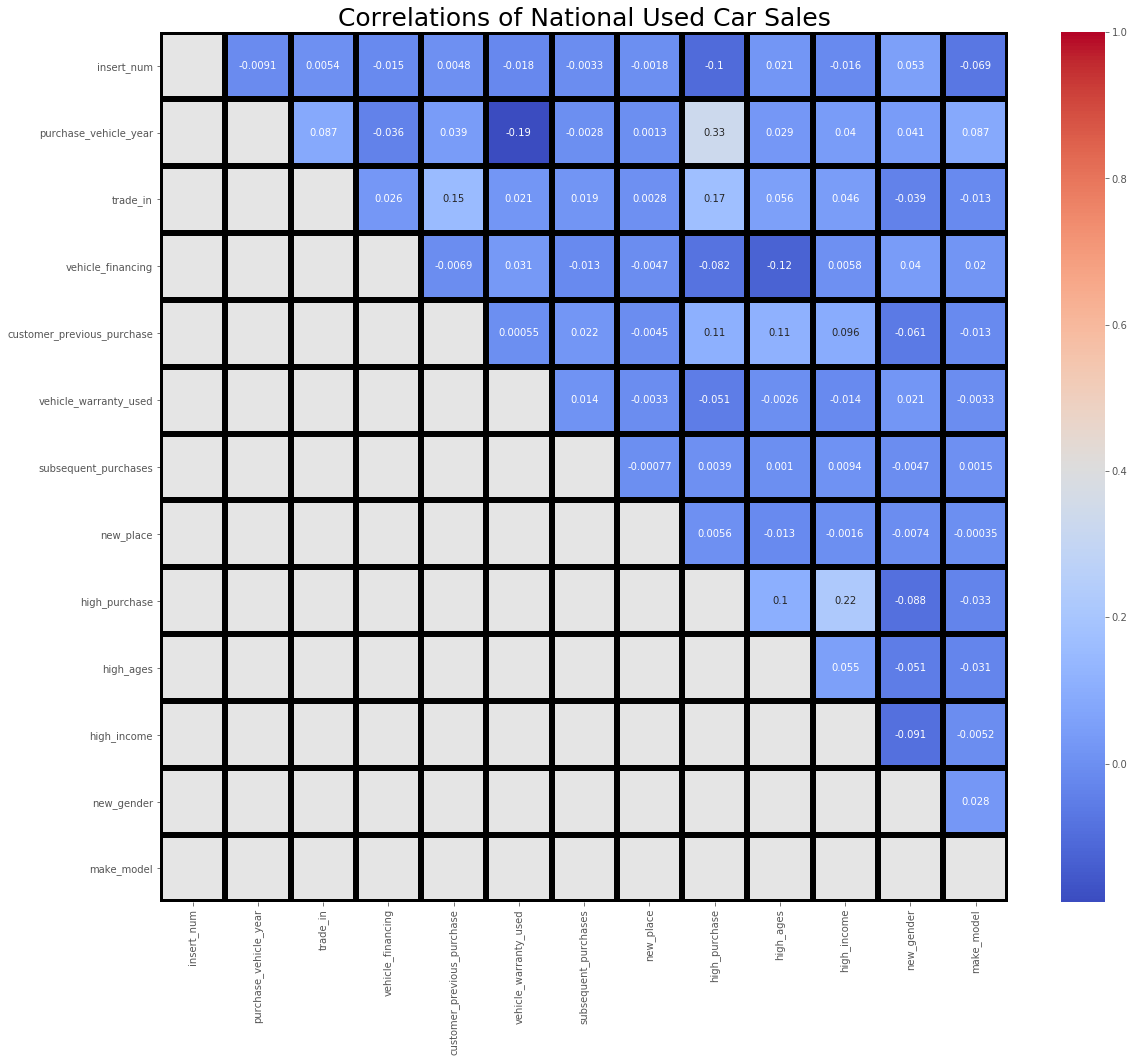

In [69]:
plt.figure(figsize=(19,16))

# Upper triangle heatmap
corr_mx = corr.corr() # correlation matrix
matrix = np.tril(corr_mx) # take lower correlation matrix
 
# Heatmap with keyword arguments (kwargs) parameter
kwargs = {'linewidth':5, 'linestyle':'--', 'rasterized':False, 'edgecolor':'b',  "capstyle":'projecting'}


plt.title("Correlations of National Used Car Sales", fontsize = 25)
sns.heatmap(corr, cmap="coolwarm", annot = True, linecolor="k",linewidths=6,**kwargs, mask = matrix)

In [18]:
df['high_purchase']

0         20000
1         20000
2         30000
3         15000
4         20000
          ...  
355869    20000
355870    15000
355871    20000
355872    15000
355873    20000
Name: high_purchase, Length: 355874, dtype: int64

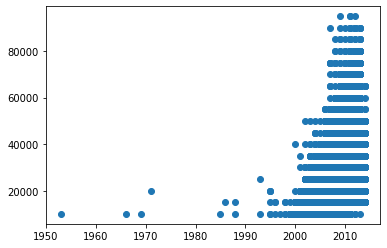

In [20]:
""" Plot the data """

    
plt.scatter(df['purchase_vehicle_year'],df['high_purchase'])
plt.show()
    

In [21]:
print(df.dtypes)

insert_num                      int64
purchase_make                  object
purchase_model                 object
purchase_vehicle_year           int64
purchase_price                 object
trade_in                        int64
vehicle_financing               int64
customer_age                   object
customer_income                object
customer_gender                object
customer_previous_purchase      int64
customer_distance_to_dealer    object
post_purchase_satisfaction     object
vehicle_warranty_used           int64
subsequent_purchases            int64
new_place                       int64
new_purchase                   object
high_purchase                   int64
high_ages                       int64
new_ages                       object
new_income                     object
high_income                     int64
new_gender                      int64
make_model                      int64
job_assign                     object
dtype: object


In [31]:
def square(value):
    x = value ** 2 
    return x
square(2)

4

In [24]:
df['high_income'].describe()


count    3.558740e+05
mean     9.981385e+04
std      1.755096e+05
min      2.000000e+04
25%      4.000000e+04
50%      6.000000e+04
75%      8.000000e+04
max      1.000001e+06
Name: high_income, dtype: float64